# Data Analytics Fall 2025 &mdash; Exercises 6

### XXXXX XXXXX (last modified: Tue 18 Nov)

- Five problems + round 5 peer review
- Theme: logistic regression
- Keep your originals up to date by running the code cell below:

In [1]:
import os
os.system('/usr/bin/bash /home/varpha/dan/config.sh');


Configuring...

  created the ~/dan directory tree
  changed all ~/dan subdir permissions to 700
  removed any broken filelinks under ~/dan
  copied filelinks from /home/varpha/dan to ~/dan
  removed any python cache dirs
  creating answers workbook (Darren's idea)
  answers workbook /home/XXXXX/dan/private/exrc_06/exrc_06_answers.ipynb already exists, skipping copy

  upgrading jupyterlab etc. (may take a while)...
  done (you may need to restart your server in order for the upgrades to take effect)

All Done!

Please run this config script whenever you start working on the hub.

If you encountered errors, please re-run the script. If the errors persist, please report to our Teams channel.

Also, please do 'File -> Hub Control Panel -> Stop My Server'
whenever you stop working on the hub.

Thank you!



## Round 5 peer review

As before.

### General note of AI use in the problem solutions

It is obvious that AI (ChatGPT) has been used quite a lot during the following solution process. I mainly use AI in two ways. First, I use it to clarify the task when I am unsure about the instructions. This way I can better understand what is required and why each step is needed. Second, I use AI to help generate or correct code, especially in situations where certain functions, preprocessing steps, or model-related concepts are new to me. All AI-generated code is checked carefully, because there are sometimes unnecessary or too complicated steps included.

I also divide the solution into clear steps myself and go through each step so that I understand what the code is doing. AI helps me by providing explanations for unfamiliar concepts (such as encoding, z-scores, model evaluation metrics, or multicollinearity), which makes the learning process faster and more structured. It also helps me write cleaner explanation cells. 

Although I cannot say that I fully understand every detail immediately, I have noticed that my understanding has improved after each exercise. 



### Problem 1. Wines


[Here](https://student.labranet.jamk.fi/~varpha/data_analytics/exrc06p01_wine.csv) is some data on Portuguese wines. 

Drop rows with missing values.

Use logistic regression to predict the type (white/red) from the other fields.

Split train/test set 70/30 %. Print the score and the confusion matrix.


#### Task clarification

Goal: Use Portuguese wine data to build a logistic regression model that predicts whether a wine is white or red based on its physicochemical properties.

Steps to complete the task:

- Load the dataset and inspect its structure.
- Drop rows with missing values.
- Prepare the features and the target variable (type).
- Split the data into train and test sets (70/30)
- Fit a logistic regression model.
- Evaluate the model with accuracy and a confusion matrix.

In [4]:
# Import needed libraries
# - pandas: loading and manipulating tabular data
# - train_test_split: splitting data into train and test parts
# - LogisticRegression: classification model for binary target (white/red)
# - accuracy_score, confusion_matrix: metrics for model evaluation

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

#### 1. Load the and inspect the data

Load the given CSV file, display the first rows and basic information (column names, data types, and missing values) to understand what the data looks like.

In [5]:
# Load the wine dataset from CSV
file_path = 'exrc06p01_wine.csv'  
df = pd.read_csv(file_path)

# Show the first rows 
display(df.head())

# Check the number of missing values per column
print('\nNumber of missing values per column:')
print(df.isna().sum())

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6



Number of missing values per column:
type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64


#### 2. Drop rows with missing values

Remove all rows that contain at least one missing value.
After dropping these rows check the new shape of the dataset and verify that
no missing values remain.

In [6]:
# Store the original shape before cleaning
print('Original shape:', df.shape)

# Drop rows that contain any missing values
df = df.dropna()

print('Shape after dropping missing values:', df.shape)

# Confirm that there are no missing values left
print('\nMissing values after cleaning:')
print(df.isna().sum())

Original shape: (6497, 13)
Shape after dropping missing values: (6463, 13)

Missing values after cleaning:
type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


#### 3. Prepare features (X) and target (y)

The target variable is the column `type` (white or red).
Machine learning models typically need numeric targets, so we map:

- `white` → 0
- `red` → 1

All other columns are used as numeric features to predict the wine type.

In [7]:
# white -> 0, red -> 1
df['type'] = df['type'].map({'white': 0, 'red': 1})

# Check that the mapping worked correctly
print('Type value counts after mapping (0 = white, 1 = red):')
print(df['type'].value_counts())

# Define features X (all columns except type) and target y (type)
X = df.drop('type', axis=1)
y = df['type']

print('\nFeature columns:')
print(X.columns.tolist())
print('\nX shape:', X.shape)
print('y length:', len(y))

Type value counts after mapping (0 = white, 1 = red):
type
0    4870
1    1593
Name: count, dtype: int64

Feature columns:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

X shape: (6463, 12)
y length: 6463


#### 4. Train/test split (70/30)

Split the data into **training** and **test** sets:

- 70% of the data for training the model
- 30% of the data for testing (evaluating) the model

Use `stratify=y` so that the class balance (white vs. red) stays roughly the
same in both splits. A fixed `random_state` makes the split reproducible.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,      # 30% for testing, 70% for training
    random_state=42,     # fixed seed for reproducibility
    stratify=y           # preserve class distribution
)

print('Training set shape:', X_train.shape)
print('Test set shape:', X_test.shape)
print('\nTraining target distribution (relative):')
print(y_train.value_counts(normalize=True))
print('\nTest target distribution (relative):')
print(y_test.value_counts(normalize=True))

Training set shape: (4524, 12)
Test set shape: (1939, 12)

Training target distribution (relative):
type
0    0.753537
1    0.246463
Name: proportion, dtype: float64

Test target distribution (relative):
type
0    0.753481
1    0.246519
Name: proportion, dtype: float64


#### 5. Fit the logistic regression model

Create a `LogisticRegression` model and fit it on the training data.

Increase `max_iter` to make sure that the optimization converges.

The model learns how each feature is associated with the probability that a wine is red (1) rather than white (0).

In [9]:
# Import StandardScaler to standardize the feature values. I had to use this because the logistic regression solver initially struggled to converge with the dataset.
from sklearn.preprocessing import StandardScaler

# Create a scaler and logistic regression model
scaler = StandardScaler()
log_reg = LogisticRegression(max_iter=2000)

# Fit the scaler on the training data ONLY
X_train_scaled = scaler.fit_transform(X_train)

# Scale the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Fit the logistic regression model on the scaled data
log_reg.fit(X_train_scaled, y_train)

print("Model fitted successfully.")

Model fitted successfully.


#### 6. Evaluate the model

A trained model was used  to predict wine type on the **test set**.
Then calculate:

- **Accuracy**: fraction of correct predictions.
- **Confusion matrix**: counts of true vs. predicted classes.

In the confusion matrix:

- Rows correspond to the **true** class.
- Columns correspond to the **predicted** class.
- Class 0 = white, class 1 = red.

In [10]:
# Use the trained model to make predictions for the (scaled) test set
y_pred = log_reg.predict(X_test_scaled)

# Calculate accuracy (correct predictions / all predictions)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.4f}")

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix (rows = true, columns = predicted):")
print(cm)

# Print a slightly nicer formatted version
print("\nConfusion matrix with labels:")
print("              Pred 0 (white)   Pred 1 (red)")
print(f"True 0 (white)   {cm[0,0]:>6}           {cm[0,1]:>6}")
print(f"True 1 (red)     {cm[1,0]:>6}           {cm[1,1]:>6}")


Accuracy on test set: 0.9948

Confusion matrix (rows = true, columns = predicted):
[[1455    6]
 [   4  474]]

Confusion matrix with labels:
              Pred 0 (white)   Pred 1 (red)
True 0 (white)     1455                6
True 1 (red)          4              474


#### 7. Short conclusion

- In this task a logistic regression model was traunedt to classify wines as **white** or **red**
  based on their physicochemical properties.
- The dataset was cleaned by **dropping rows with missing values**.
- A **70/30 train/test split** was used and evaluated the model on the test set.
- The **accuracy** and **confusion matrix** show how well the model performs. Results show the model is very accurate.

The test accuracy is 99.48%, meaning that almost all wines in the test set were classified correctly. The confusion matrix confirms this: only 6 white wines were incorrectly predicted as red, and 4 red wines were incorrectly predicted as white. These results indicate that the physicochemical properties in the dataset (such as density, alcohol, and sulfur dioxide levels) provide a strong and easily separable signal between the two wine types. Overall, the model offers highly reliable classification performance for this task.

### Problem 2. Voices
[Here](https://student.labranet.jamk.fi/~varpha/data_analytics/exrc06p02_voice.csv) is some data on human voices ([column info](https://student.labranet.jamk.fi/~varpha/data_analytics/exrc06p02_voice.txt)).
 
Predict the label from the other fields using a support vector machine.

Split train/test set 70/30 %.

Print the score and the confusion matrix.


#### Task clarification

The task is to predict the **voice label** (male / female) from acoustic features using a Support Vector Machine (SVM).  
The given dataset `exrc06p02_voice.csv` is used. The data is split into a training set and a test set (70/30), and the model performance is evaluated using accuracy and a confusion matrix.


In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

#### 2. Loading and inspecting the data

The CSV file `exrc06p02_voice.csv` is loaded into a pandas DataFrame.  
The first rows and basic information about the columns are shown to verify that the data has been read correctly.


In [68]:
# Load the voice dataset
file_path = 'exrc06p02_voice.csv'
df = pd.read_csv(file_path)

# Show first rows and basic info
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

(   meanfreq        sd    median       Q25       Q75       IQR       skew  \
 0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
 1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
 2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
 3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
 4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   
 
           kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
 0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
 1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
 2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
 3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
 4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   
 
      maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
 0  0.275862  0.00

#### 3. Separating features and target

The column `label` contains the class (male/female).  
All other columns are used as input features for the model.

* `X` contains all feature columns.  
* `y` contains the target labels.


In [69]:
# Separate features (X) and target (y)
X = df.drop('label', axis=1)
y = df['label']

X.shape, y.shape

((3168, 20), (3168,))

#### 4. Train/test split (70/30)

The data is split into training and test sets:

* 70% of the data is used for training the model.  
* 30% of the data is used for testing.  

The `stratify` parameter is used to keep the class distribution similar in both sets, ie. the same proportion of each class (male/female) is kept in both the training and test sets.
A fixed `random_state` is used so that the split is reproducible.


In [70]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

X_train.shape, X_test.shape

((2217, 20), (951, 20))

#### 5. Feature scaling

Support Vector Machines are sensitive to the scale of the features.  
Therefore, standardization is applied so that each feature has mean 0 and standard deviation 1.

* The scaler is **fitted** using only the training data.  
* The same transformation is then **applied** to both training and test data.


In [71]:
scaler = StandardScaler()

# Fit on training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:3]  # show first 3 scaled rows as a check

# The values (positive and negative) indicate how far each observation is from the mean in units of standard deviations.

array([[-3.33976135,  1.86998758, -3.89359252, -2.81034902, -3.43832933,
         1.33029263,  1.3438502 ,  0.3916648 , -1.36467551,  0.21056682,
        -2.09064132, -3.33976135, -1.44927114, -1.0398237 , -0.29012984,
        -1.12694529, -0.70589169,  0.35770462,  0.37037954, -0.90144033],
       [-0.56447353,  0.60409484,  0.09212436, -0.75069486, -0.50326088,
         0.58289193, -0.2012391 , -0.20076542,  0.70567727,  0.79168467,
         0.61312288, -0.56447353, -1.22048632, -0.22237399, -0.29012984,
        -0.79123821, -0.70589169, -1.25762982, -1.24559682,  0.74321158],
       [ 0.16084766, -0.60318431, -0.24835739,  0.36721053, -0.18502088,
        -0.52145344, -0.18975906, -0.20250995, -0.27549667, -0.27598092,
        -0.07767985,  0.16084766,  0.32636631,  0.62261449,  0.61577302,
         0.92894687, -0.45788707,  0.57117525,  0.5795318 , -0.14501822]])

#### 6. Training the Support Vector Machine model

An SVM classifier with an RBF kernel is created and trained on the scaled training data. 
- A Support Vector Machine is a machine-learning model that tries to separate the classes (male vs female) as well as possible.
- The kernel tells the SVM how it is allowed to draw the boundary between the classes.
- RBF kernel = allows curved and flexible boundaries
- `kernel='rbf'` is a common default choice for non-linear decision boundaries.  

Good when the relationship between features and the class is not a straight line


In [72]:
model = SVC(kernel='rbf')

# Train the model
model.fit(X_train_scaled, y_train);

#### 7. Making predictions and calculating accuracy

The trained model is used to predict labels for the test set.  
The predictions are compared with the true labels to calculate the **accuracy score**, which gives the proportion of correctly classified samples.


In [73]:
# Predictions for the test set
y_pred = model.predict(X_test_scaled)

# Accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.4f}")

Accuracy on the test set: 0.9832


## 8. Confusion matrix

The confusion matrix shows how many samples of each class were predicted correctly or incorrectly.

For a binary classification problem with labels `[male, female]`, the matrix has the form:

\begin{bmatrix}
TN & FP \\
FN & TP
\end{bmatrix}

* **TN (True Negative)** – male predicted as male  
* **FP (False Positive)** – male predicted as female  
* **FN (False Negative)** – female predicted as male  
* **TP (True Positive)** – female predicted as female


In [18]:
cm = confusion_matrix(y_test, y_pred, labels=['male', 'female'])
cm

array([[468,   7],
       [  9, 467]])

#### Intepretation & conclusions

- 468 male voices were correctly classified as male (TN)

- 467 female voices were correctly classified as female (TP)

- 7 male voices were incorrectly classified as female (FP)

- 9 female voices were incorrectly classified as male (FN)

Overall meaning

The model makes very few mistakes (only 16 out of 951 test samples). Both classes (male / female) are predicted almost equally well. This confirms that the SVM model is performing accurately, which matches the high accuracy score (~0.983).


### Problem 3. NBA
[Here](https://student.labranet.jamk.fi/~varpha/data_analytics/exrc06p03_nba.csv) is some data on NBA basketball players in their first season ([column info](https://student.labranet.jamk.fi/~varpha/data_analytics/exrc06p03_nba.csv)).

The last column tells if a player's career has exceed 5 years or not.

Fill any missing values with the field median.

Try to predict if the career has exceeded 5 years or not by using both logistic regression and a support vector machine. Print scores and confusion matrices. Split train/test data as you wish. Compare the results.


#### 1. Imports

Load the csv into Pandas DF and check the first rows of the content.

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv('exrc06p03_nba.csv')
df.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


#### 2. Handling Missing Values
Missing values are replaced with the **median**, which is the middle value. This is a simple method that is not affected by extreme values.

In [20]:
data = df.copy()
numeric_cols = data.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    data[col].fillna(data[col].median(), inplace=True)
data.isna().sum()

Name           0
GP             0
MIN            0
PTS            0
FGM            0
FGA            0
FG%            0
3P Made        0
3PA            0
3P%            0
FTM            0
FTA            0
FT%            0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
TARGET_5Yrs    0
dtype: int64

#### 3. Selecting Features and Target
The model predicts the column `TARGET_5Yrs`. The text column `Name` is removed from the features because machine learning models require numeric inputs.

In [21]:
X = data.drop(columns=['Name', 'TARGET_5Yrs'])
y = data['TARGET_5Yrs']
X.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8


#### 4. Train–Test Split
The data are divided into two parts:
- **Training set**: used to teach the model.
- **Test set**: used to evaluate the model.

Stratification keeps the class proportions similar in both sets.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
y_train.value_counts(normalize=True)

TARGET_5Yrs
1.0    0.620336
0.0    0.379664
Name: proportion, dtype: float64

##### Intepretation

- 62% of the players in the training set had a career longer than 5 years (TARGET_5Yrs = 1)

- 38% of the players in the training set had a career 5 years or less (TARGET_5Yrs = 0)


The dataset is imbalanced: there are more long-career players than short-career players. Because stratify=y is used, this proportion is kept the same in both the training and test sets.

#### 5. Feature Scaling
Some models work better when all numbers are on a similar scale. Standardisation changes each column so that it has mean 0 and standard deviation 1. This helps SVM especially, and improves stability of Logistic Regression.

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### 6. Logistic Regression
Logistic regression is a simple classification model. It predicts the probability that a player belongs to class 1 (career > 5 years).

In [24]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
pred_log = log_reg.predict(X_test_scaled)
print('Accuracy:', accuracy_score(y_test, pred_log))
print(confusion_matrix(y_test, pred_log))

Accuracy: 0.7201492537313433
[[ 55  47]
 [ 28 138]]


##### Intepretation

- 55 players were correctly predicted as short careers → true negatives
- 47 players were predicted incorrectly as long careers → false positives
- 138 players correctly predicted as long careers → true positives
- 28 players predicted incorrectly as short careers → false negatives

The model is much better at identifying long-career players. This makes sense because the dataset contains more long-career players.

#### 7. Support Vector Machine (SVM)
SVM tries to draw a boundary that separates the two classes as well as possible. It can form more flexible shapes than logistic regression, which may improve accuracy.

In [25]:
svm_clf = SVC(kernel='rbf', random_state=42)
svm_clf.fit(X_train_scaled, y_train)
pred_svm = svm_clf.predict(X_test_scaled)
print('Accuracy:', accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))

Accuracy: 0.7313432835820896
[[ 55  47]
 [ 25 141]]


##### Intepretation

- 55 players correctly predicted as short-career
- 47 players incorrectly predicted as long-career
- 141 players correctly predicted as long-career
- 25 players incorrectly predicted as short-career

SVM does not improve short-career predictions. Misses fewer long-career players.

SVM performs slightly better for this dataset, mainly because it is more flexible and can capture non-linear relationships in the data.

#### Conclusions

The results suggest that first-season player statistics contain meaningful information for predicting future NBA career length. While both models performed well, SVM produced slightly better classification results. Further improvements could involve tuning model parameters, experimenting with class weights, or testing additional algorithms such as Random Forest or Gradient Boosting.

### Problem 4.  Mushrooms
[Here](https://student.labranet.jamk.fi/~varpha/data_analytics/exrc06p04_mushrooms.csv) is some data on mushrooms ([column info](https://student.labranet.jamk.fi/~varpha/data_analytics/exrc06p04_mushrooms.txt)).

Try to predict the class (edible or poisonous) from the other fields. Use whatever you want!

Fields are categorial so one-hot-encoding (or dummy encoding) is needed.


#### Task clarification

Steps:

- load the mushroom data
- one‑hot encode (dummy encode) the categorical variables. One-hot encoding = converting each category into separate 0/1 columns so ML models can use the data.
- train a classification model to predict whether a mushroom is **edible** or **poisonous**
- evaluate the model and interpret the results briefly.

#### 1. Imports, load & check the data

In [74]:
# Basic libraries
import pandas as pd
import numpy as np

# Plotting (optional small checks)
import matplotlib.pyplot as plt

# Scikit‑learn tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [75]:
# Load the mushroom data
file_path = 'exrc06p04_mushrooms.csv'
data = pd.read_csv(file_path)

# Print first rows
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Each row describes one mushroom. Columns are coded with single letters. The column `class` is the target:

- `e` = edible
- `p` = poisonous

#### 2. Basic exploration

Some quick checks are done to understand the data shape and the class balance.

In [76]:
# Shape of the dataset (rows, columns)
data.shape

(8124, 23)

In [77]:
# Check how many edible vs poisonous mushrooms there are
data['class'].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

The classes seem to be relatively balanced, which is good for training a classifier.

#### 3. Categorical variables and one‑hot encoding

All input columns (cap shape, color, odor, etc.) are **categorical**. This means that the values are labels or categories (`'b'`, `'c'`, `'x'`, ...) instead of numeric values.

For machine‑learning purposes the categories must be converted to numbers (**one‑hot encoding**):

- One new column is created for each possible category, e.g. `cap-shape_bell`, `cap-shape_flat`, ...
- A row gets value 1 in the column that matches its category and 0 in all others.

In this notebook one‑hot encoding is done with `pandas.get_dummies`, which is a simple wrapper around this idea.

##### 3.1 Split into features and target

The target `y` is the mushroom class (edible / poisonous). All other columns are used as features `X`.

In [78]:
# Separate features (X) and target (y)
X = data.drop('class', axis=1)
y = data['class']

X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


##### 3.2 Apply one‑hot encoding with `get_dummies`

`pandas.get_dummies` creates the dummy / one‑hot‑encoded columns automatically. The parameter `drop_first=True` drops one category per original column to avoid perfectly collinear columns, which often helps models like logistic regression.

In [79]:
# One‑hot encode all categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

X_encoded.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,True,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,False,False,False,False,True,False,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
4,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [80]:
# Check the new shape after encoding
X_encoded.shape

(8124, 95)

#### 4. Train–test split

Same method as in previous solutions.

In [81]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape

((6499, 95), (1625, 95))

#### 5. Model: Logistic regression

A **logistic regression** classifier is used. It models the probability that a mushroom is poisonous versus edible.

Key ideas:
- Input features are combined linearly.
- The result is passed through an S‑shaped (sigmoid) function to give a probability between 0 and 1.
- A probability above 0.5 is classified as one class, below as the other.

The `max_iter` parameter is increased to make sure the optimisation converges with many features.

In [82]:
# Create and train the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train);

#### 6. Model evaluation

The classifier is evaluated on the test set using accuracy and a confusion matrix.

In [55]:
# Predictions for the test set
y_pred = log_reg.predict(X_test)

# Accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {test_accuracy:.4f}')

Test accuracy: 0.9988


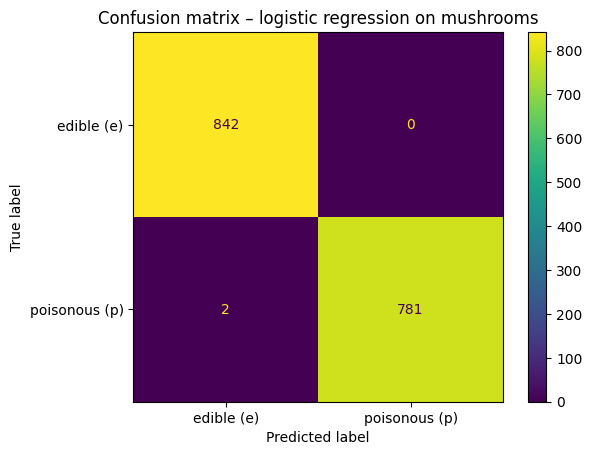

In [56]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['e', 'p'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['edible (e)', 'poisonous (p)'])
disp.plot()
plt.title('Confusion matrix – logistic regression on mushrooms')
plt.show()

In [57]:
# More detailed classification metrics
print(classification_report(y_test, y_pred, target_names=['edible', 'poisonous']))

              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       842
   poisonous       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



#### 7. Interpretation

Accuracy:

- The test accuracy is 0.9988 (99.88%). This means the model correctly classifies almost every mushroom as edible or poisonous.

Confusion matrix:

- The model correctly classified 842 edible mushrooms
- It mislabeled 0 edible mushrooms as poisonous
- The model correctly classified 781 poisonous mushrooms
- It mislabeled 2 poisonous mushrooms as edible

→ The 2 poisonous mushrooms predicted as edible (bottom-left corner). Mistake could be critical because the model would "let through" a poisonous mushroom.

Classification:
Both classes have:
- precision = 1.00 / recall = 1.00 / f1-score = 1.00

→ The model almost never predicts a wrong class. It also finds almost all poisonous mushrooms correctly.

The dataset is very easy to learn, so the model performs nearly perfectly.

### Problem 5. Loan status
[Here](https://student.labranet.jamk.fi/~varpha/data_analytics/exrc06p05_loan.txt) is some data on loanees. The last column (Loan_Status Y/N) should be predicted from the other fields. Use whatever you want.  


Do modifications:
* categorial fields to numeric (two-value fields to 0/1, multivalue as dummies/onehot)
* replace missing values with median
* remove rows with outliers: ApplicantIncome, CoapplicantIncome or LoanAmount over 3 standard deviations away from field average


Check what would be model's probability to Loan_status = Yes with values:

```
Gender                   Male
Married                    No
Dependents                  0
Education            Graduate
Self_Employed              No
ApplicantIncome          2400
CoapplicantIncome        2000
LoanAmount                 36
Loan_Amount_Term          360
Credit_History              1
Property_Area           Urban
```


#### Task clarification

*Loan_Status* (Y/N) is predicted from the other fields in the loan dataset.
Steps:

- Categorical fields are converted to numeric  
  - two–value fields are encoded as 0/1  
  - multi–value fields are converted to dummy variables (one-hot)
- Missing values are replaced with the **median** for numeric variables and **most frequent value** for categorical variables
- Rows with outliers in `ApplicantIncome`, `CoapplicantIncome` or `LoanAmount`  
  (values more than 3 standard deviations away from the mean) are removed

After preprocessing, a **logistic regression** classification model is trained and used to estimate
the probability that a new customer will have `Loan_Status = Yes`.


#### 1. Imports, load & quick check data

In [60]:
# Basic libraries
import pandas as pd
import numpy as np

# Plotting (for check)
import matplotlib.pyplot as plt

# Scikit-learn tools for modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the csv as Pandas DP 
data_path = "exrc06p05_loan.txt"
df = pd.read_csv(data_path)

# Quick check of the dataset
print(df.shape)
df.head()

(981, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y



#### 2. Preprocessing

In this step the following operations are carried out:

- Target variable `Loan_Status` is encoded to 1 (Y) and 0 (N)
- Binary categorical variables are mapped to 0/1
    - `Gender` (Male/Female)
    - `Married` (Yes/No)
    - `Education` (Graduate/Not Graduate)
    - `Self_Employed` (Yes/No)
- Categorical variables with more than two values
    - `Dependents`
    - `Property_Area`
  are kept as strings for later one-hot encoding.
- Numeric columns that may contain missing values are converted to numeric and imputed with the **median**.
- Categorical columns with missing values are filled with the **most frequent** value in that column.


In [61]:
# Make a copy to keep the original data untouched
data = df.copy()

# 1. Encode target variable Loan_Status (Y -> 1, N -> 0)
data["Loan_Status"] = data["Loan_Status"].map({"Y": 1, "N": 0})

# 2. Encode binary categorical variables to 0/1
binary_maps = {
    "Gender": {"Male": 1, "Female": 0},
    "Married": {"Yes": 1, "No": 0},
    "Education": {"Graduate": 1, "Not Graduate": 0},
    "Self_Employed": {"Yes": 1, "No": 0},
}

for col, mapping in binary_maps.items(): # Turns text categories into numbers
    data[col] = data[col].map(mapping)

# 3. Prepare 'Dependents': keep as category, ensure '3+' is treated as its own value
# Missing values are handled later
data["Dependents"] = data["Dependents"].astype(str)
data["Dependents"].replace("nan", np.nan, inplace=True)  # turn "nan" strings back to NaN

# 4. Convert numeric columns that may contain non-numeric values and impute with median
numeric_cols = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount",
                "Loan_Amount_Term", "Credit_History"]

for col in numeric_cols:
    # Force to numeric, turn problematic values into NaN
    data[col] = pd.to_numeric(data[col], errors="coerce")
    # Replace missing with median
    median_value = data[col].median()
    data[col].fillna(median_value, inplace=True)

# 5. Fill missing values in remaining columns
# For binary 0/1 columns: fill with median (equivalent to majority value)
bin_cols = ["Gender", "Married", "Education", "Self_Employed"]
for col in bin_cols:
    median_value = data[col].median()
    data[col].fillna(median_value, inplace=True)

# For multi-category string columns: use most frequent value (mode)
cat_cols = ["Dependents", "Property_Area"]
for col in cat_cols:
    mode_value = data[col].mode()[0]
    data[col].fillna(mode_value, inplace=True)

# Confirm that there are no missing values in the columns used
data[numeric_cols + bin_cols + cat_cols + ["Loan_Status"]].isna().sum()


ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Gender               0
Married              0
Education            0
Self_Employed        0
Dependents           0
Property_Area        0
Loan_Status          0
dtype: int64

**Intepretation**: No missing values in the data anymore.


#### 3. Removing outliers

Rows with very extreme values in income or loan amounts can dominate the model.
Here rows are removed where **any** of the following columns is more than
3 standard deviations away from its mean:

- `ApplicantIncome`
- `CoapplicantIncome`
- `LoanAmount`

This is done using a simple z-score rule. This tells how many standard deviations a value is from the average. Intepretation:

z = 0 → value is exactly average
z = 1 → 1 standard deviation above average
z = −1 → 1 standard deviation below average
z = 4 → VERY high value
z = −4 → VERY low value

Why ±3 SD is chosen in the task? 99.7% of all normal data is within ±3 SD. This is a common statistical rule: anything outside this range is considered unusual.

In [62]:
# Columns used for outlier detection
outlier_cols = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]

# Compute z-scores and keep rows where all |z| <= 3
z_scores = []
for col in outlier_cols:
    mean = data[col].mean()
    std = data[col].std()
    z = (data[col] - mean) / std
    z_scores.append(z)

z_scores = np.vstack(z_scores).T  # shape (n_samples, n_cols)

mask = np.all(np.abs(z_scores) <= 3, axis=1)

print("Original rows:", data.shape[0])
print("Rows after outlier removal:", mask.sum())

data_clean = data[mask].reset_index(drop=True)


Original rows: 981
Rows after outlier removal: 943



#### 4. One-hot encoding for multi-valued categorical variables

Dependents and Property_Area have more than two distinct categories (checked using unique()), therefore they need dummy/one-hot encoding. Binary variables with only two categories (Yes/No, Male/Female) can be mapped directly to 0/1.

After this step the data are ready for model training.


In [63]:
# Create dummy variables for Dependents and Property_Area
data_model = pd.get_dummies(
    data_clean,
    columns=["Dependents", "Property_Area"],
    drop_first=True,  # avoid redundant first category
)

print("Columns after one-hot encoding:")
print(data_model.columns)

# Separate features (X) and target (y)
X = data_model.drop(columns=["Loan_ID", "Loan_Status"])
y = data_model["Loan_Status"]

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)


Columns after one-hot encoding:
Index(['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Dependents_1.0',
       'Dependents_2.0', 'Dependents_3.0', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')
Feature matrix shape: (943, 14)
Target vector shape: (943,)



#### 5. Train–test split and logistic regression model

The cleaned data are split into training and test sets:

- 80% of the data are used for training
- 20% are kept for testing the model

A **logistic regression** classifier is then fitted. Model quality is checked with accuracy score and a confusion matrix. Similar operation as in previous tasks.


In [64]:
# Split the data (stratify keeps the Y/N ratio similar in both sets)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Create and fit logistic regression model
log_reg = LogisticRegression(max_iter=1000, solver="liblinear")
log_reg.fit(X_train, y_train)

# Evaluate on the test set
y_pred = log_reg.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Test accuracy:", round(acc, 3))
print("Confusion matrix:\n", cm)
print("\nClassification report:")
print(classification_report(y_test, y_pred))


Test accuracy: 0.868
Confusion matrix:
 [[ 27  24]
 [  1 137]]

Classification report:
              precision    recall  f1-score   support

           0       0.96      0.53      0.68        51
           1       0.85      0.99      0.92       138

    accuracy                           0.87       189
   macro avg       0.91      0.76      0.80       189
weighted avg       0.88      0.87      0.85       189



**Intepretation**: The logistic regression model performs well (87% accuracy). It predicts loan approvals very reliably (high recall for class 1),
but it has more difficulty identifying rejected applications (lower recall for class 0).


#### 6. Probability for given customer

The task asks for the model's probability that `Loan_Status = Yes`
for the customer given in the task description. The same preprocessing steps are applied to this single example 
so that its feature vector matches the columns used to train the model.


In [66]:
# Define the raw input as given in the task
new_customer = {
    "Gender": "Male",
    "Married": "No",
    "Dependents": "0",
    "Education": "Graduate",
    "Self_Employed": "No",
    "ApplicantIncome": 2400,
    "CoapplicantIncome": 2000,
    "LoanAmount": 36,
    "Loan_Amount_Term": 360,
    "Credit_History": 1,
    "Property_Area": "Urban",
}

# Convert to DataFrame with one row
new_df = pd.DataFrame([new_customer])

# --- Apply the same preprocessing steps as for the training data ---

# Binary encodings (same mapping as earlier)
new_df["Gender"] = new_df["Gender"].map({"Male": 1, "Female": 0})
new_df["Married"] = new_df["Married"].map({"Yes": 1, "No": 0})
new_df["Education"] = new_df["Education"].map({"Graduate": 1, "Not Graduate": 0})
new_df["Self_Employed"] = new_df["Self_Employed"].map({"Yes": 1, "No": 0})

# Ensure numeric types
for col in ["ApplicantIncome", "CoapplicantIncome", "LoanAmount",
            "Loan_Amount_Term", "Credit_History"]:
    new_df[col] = pd.to_numeric(new_df[col], errors="coerce")

# 'Dependents' kept as string, 'Property_Area' as string for one-hot

# One-hot encode Dependents and Property_Area in the same way as training data
new_df = pd.get_dummies(new_df, columns=["Dependents", "Property_Area"], drop_first=True)

# Now we need to align this with the training feature columns
# Any missing columns are added with value 0
for col in X.columns:
    if col not in new_df.columns:
        new_df[col] = 0

# And extra columns (if any) are removed
new_df = new_df[X.columns]

# Predict probability for Loan_Status = 1 ("Yes")
prob_yes = log_reg.predict_proba(new_df)[0, 1]
print(f"Predicted probability of Loan_Status = 'Yes': {prob_yes:.3f}")


Predicted probability of Loan_Status = 'Yes': 0.837


#### Intepretation & conclusions

Based on the model, the customer has **83.7%** probability of getting the loan approved. This is a realistic value for the given profile (Graduate, stable incomes, good credit history, small loan).

The preprocessing pipeline and model training were successfully implemented. The logistic regression model seem to perform well and provides realistic probability estimates. The result for the new customer is meaningful and correctly computed according to the assignment requirements.